Enter the keyword/hashtag to search about:bitcoin
Enter how many tweets to analyze:30
The price of bitcoin just shot up after a financial giant expressed interest in cryptocurrency market https://t.co/0kp001eTcf
Sentiment(polarity=0.0, subjectivity=0.5)
XRP is Not a Real Cryptocurrency, Says Expert https://t.co/V3p57vIrCY
Sentiment(polarity=-0.1, subjectivity=0.30000000000000004)
Greening the blockchain: Beyond Bitcoin mining https://t.co/7MhrehIXws #bitcoin #blockchain #sustainability
Sentiment(polarity=0.0, subjectivity=0.0)
RT @creamcoin: Creamcoin [CRM]
🌐 https://t.co/dt8LcWTEVg
Creamcoin Online Wallet - Cream VAULT
#mining #btc #altcoin #exchange #blockchain…
Sentiment(polarity=0.0, subjectivity=0.0)
@AndreaDraghetti @cesco_78 @evaristegal0is @HostFat Franco lo conoscevo (via chat) da molto prima di Bitcoin, si in… https://t.co/OkVGpaK45Y
Sentiment(polarity=0.0, subjectivity=0.0)
Whalepool Live Bitcoin / Cryptocurrency Trading Stream 24/7/365 [Crypto Btc] https://t.co/YsA4wzhLzg h

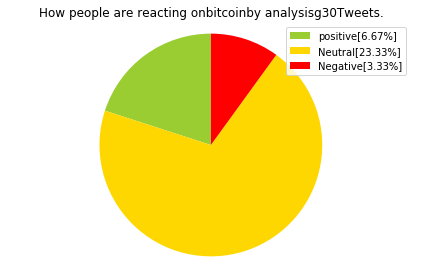

In [2]:
from textblob import TextBlob
import sys, tweepy
from tweepy import OAuthHandler
import matplotlib.pyplot as plt


def percentage(part,whole):
    return 100*float(part)/float(whole)



ConsumerKey = "wm3Y9iP9YeRVLEb93OHBm7QNK"
ConsumerSecret="ii5FMEhEf54ytqifYn6mFFNYfHXKjdtdNf9D1eP4nqUR87OWAe"
accessToken="911904615578312704-VIjJCIHX3EZMNAAsL4D2CwAgeCy3Ap7"
accessTokenSecret="LWcSyd6uInA7bMwt7MrSxezpsb1qh8K499kqExqrgzRQV"


auth = tweepy.OAuthHandler(consumer_key=ConsumerKey,consumer_secret=ConsumerSecret)
auth.set_access_token(accessToken,accessTokenSecret)
api= tweepy.API(auth)

SearchTerm = input("Enter the keyword/hashtag to search about:")
noOfSearchTerm = int(input("Enter how many tweets to analyze:"))

tweets=api.search('Bitcoin')


positive=0
negative=0
neutral=0
polarity=0

for tweet in tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity
    print(analysis.sentiment)


    if(analysis.sentiment.polarity == 0):
        neutral += 1

    elif (analysis.sentiment.polarity < 0.00):
        negative += 1

    elif (analysis.sentiment.polarity > 0.00):
        positive += 1
        
            
        
positive = percentage(positive,noOfSearchTerm)
negative = percentage(negative,noOfSearchTerm)
neutral = percentage(neutral,noOfSearchTerm)


positive = format(positive,'.2f')
negative = format(negative,'.2f')
neutral = format(neutral,'.2f')


print(" How people are reacting on "+  SearchTerm  + " by analysisg "+ str(noOfSearchTerm)  + "Tweets.")

if (polarity ==0):
    print("Neutral")
if (polarity <0):
    print("Negative")
if (polarity >0):
    print("Positive")

    
labels=['positive['+str(positive)+'%]','Neutral['+str(neutral)+'%]','Negative['+str(negative)+'%]']
sizes=[positive,neutral,negative]
colors = ['yellowgreen','gold','red']
patches,texts=plt.pie(sizes,colors=colors,startangle=90)
plt.legend(patches,labels,loc="best")
plt.title('How people are reacting on' +SearchTerm+  'by analysisg'   +str(noOfSearchTerm)+  'Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()

